<a href="https://colab.research.google.com/github/youngchul-sung/deep-learning-with-python/blob/master/4_4_overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

from tensorflow import keras
keras.__version__

TensorFlow 2.x selected.


'2.2.4-tf'

In [0]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from tensorflow.keras import models, layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [0]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 126us/sample - loss: 0.4410 - acc: 0.8230 - val_loss: 0.3301 - val_acc: 0.8787
Epoch 2/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.2514 - acc: 0.9108 - val_loss: 0.2973 - val_acc: 0.8792
Epoch 3/20
25000/25000 [==============================] - 2s 82us/sample - loss: 0.1966 - acc: 0.9304 - val_loss: 0.2837 - val_acc: 0.8871
Epoch 4/20
25000/25000 [==============================] - 2s 82us/sample - loss: 0.1625 - acc: 0.9437 - val_loss: 0.3006 - val_acc: 0.8828
Epoch 5/20
25000/25000 [==============================] - 2s 81us/sample - loss: 0.1423 - acc: 0.9495 - val_loss: 0.3213 - val_acc: 0.8779
Epoch 6/20
25000/25000 [==============================] - 2s 81us/sample - loss: 0.1241 - acc: 0.9569 - val_loss: 0.3526 - val_acc: 0.8714
Epoch 7/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.1107 - acc: 0.9624 - val_loss: 0

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 105us/sample - loss: 0.5342 - acc: 0.8073 - val_loss: 0.4374 - val_acc: 0.8566
Epoch 2/20
25000/25000 [==============================] - 2s 82us/sample - loss: 0.3517 - acc: 0.8876 - val_loss: 0.3367 - val_acc: 0.8795
Epoch 3/20
25000/25000 [==============================] - 2s 82us/sample - loss: 0.2664 - acc: 0.9091 - val_loss: 0.2956 - val_acc: 0.8860
Epoch 4/20
25000/25000 [==============================] - 2s 82us/sample - loss: 0.2196 - acc: 0.9231 - val_loss: 0.2813 - val_acc: 0.8898
Epoch 5/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.1901 - acc: 0.9344 - val_loss: 0.2783 - val_acc: 0.8888
Epoch 6/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.1674 - acc: 0.9427 - val_loss: 0.2833 - val_acc: 0.8866
Epoch 7/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.1489 - acc: 0.9485 - val_loss: 0

In [0]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [0]:
import matplotlib.pyplot as plt

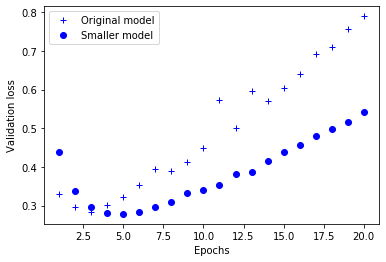

In [9]:
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [11]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 116us/sample - loss: 0.5439 - acc: 0.7827 - val_loss: 0.3857 - val_acc: 0.8236
Epoch 2/20
25000/25000 [==============================] - 2s 90us/sample - loss: 0.2332 - acc: 0.9085 - val_loss: 0.2828 - val_acc: 0.8848
Epoch 3/20
25000/25000 [==============================] - 2s 90us/sample - loss: 0.1207 - acc: 0.9565 - val_loss: 0.3506 - val_acc: 0.8810
Epoch 4/20
25000/25000 [==============================] - 2s 92us/sample - loss: 0.0524 - acc: 0.9825 - val_loss: 0.6494 - val_acc: 0.8513
Epoch 5/20
25000/25000 [==============================] - 2s 90us/sample - loss: 0.1135 - acc: 0.9856 - val_loss: 0.4781 - val_acc: 0.8840
Epoch 6/20
25000/25000 [==============================] - 2s 90us/sample - loss: 7.2816e-04 - acc: 0.9999 - val_loss: 0.6741 - val_acc: 0.8834
Epoch 7/20
25000/25000 [==============================] - 2s 89us/sample - loss: 4.5742e-05 - acc: 1.0000 - val

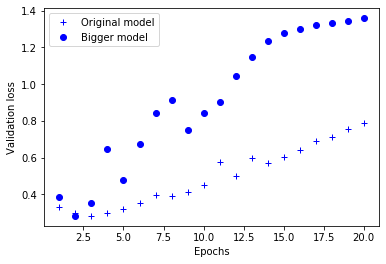

In [12]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

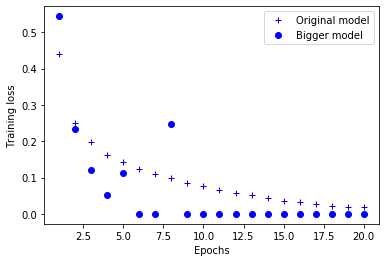

In [13]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [0]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 109us/sample - loss: 0.5076 - acc: 0.8205 - val_loss: 0.3933 - val_acc: 0.8804
Epoch 2/20
25000/25000 [==============================] - 2s 85us/sample - loss: 0.3254 - acc: 0.9034 - val_loss: 0.3381 - val_acc: 0.8877
Epoch 3/20
25000/25000 [==============================] - 2s 84us/sample - loss: 0.2761 - acc: 0.9176 - val_loss: 0.3261 - val_acc: 0.8897
Epoch 4/20
25000/25000 [==============================] - 2s 81us/sample - loss: 0.2534 - acc: 0.9266 - val_loss: 0.3302 - val_acc: 0.8869
Epoch 5/20
25000/25000 [==============================] - 2s 84us/sample - loss: 0.2386 - acc: 0.9326 - val_loss: 0.3427 - val_acc: 0.8821
Epoch 6/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.2296 - acc: 0.9371 - val_loss: 0.3467 - val_acc: 0.8824
Epoch 7/20
25000/25000 [==============================] - 2s 85us/sample - loss: 0.2239 - acc: 0.9388 - val_loss: 0

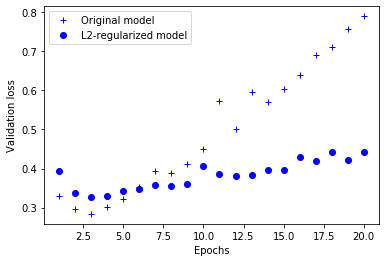

In [17]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [20]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 108us/sample - loss: 0.5786 - acc: 0.8124 - val_loss: 0.4449 - val_acc: 0.8732
Epoch 2/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.3779 - acc: 0.8925 - val_loss: 0.3667 - val_acc: 0.8884
Epoch 3/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.3279 - acc: 0.9045 - val_loss: 0.3559 - val_acc: 0.8872
Epoch 4/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.3083 - acc: 0.9126 - val_loss: 0.3583 - val_acc: 0.8868
Epoch 5/20
25000/25000 [==============================] - 2s 82us/sample - loss: 0.2942 - acc: 0.9164 - val_loss: 0.3580 - val_acc: 0.8848
Epoch 6/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.2868 - acc: 0.9212 - val_loss: 0.3628 - val_acc: 0.8840
Epoch 7/20
25000/25000 [==============================] - 2s 81us/sample - loss: 0.2781 - acc: 0.9240 - val_loss: 0

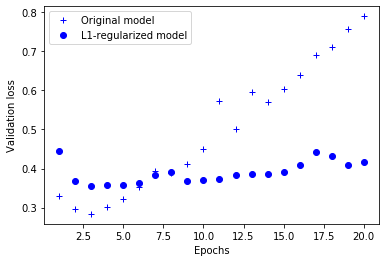

In [21]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [24]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 109us/sample - loss: 0.5747 - acc: 0.8108 - val_loss: 0.4367 - val_acc: 0.8787
Epoch 2/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.3776 - acc: 0.8954 - val_loss: 0.3827 - val_acc: 0.8805
Epoch 3/20
25000/25000 [==============================] - 2s 85us/sample - loss: 0.3320 - acc: 0.9057 - val_loss: 0.3571 - val_acc: 0.8888
Epoch 4/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.3134 - acc: 0.9114 - val_loss: 0.3550 - val_acc: 0.8883
Epoch 5/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.3005 - acc: 0.9162 - val_loss: 0.3622 - val_acc: 0.8861
Epoch 6/20
25000/25000 [==============================] - 2s 82us/sample - loss: 0.2921 - acc: 0.9190 - val_loss: 0.3665 - val_acc: 0.8844
Epoch 7/20
25000/25000 [==============================] - 2s 84us/sample - loss: 0.2860 - acc: 0.9237 - val_loss: 0

In [0]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [26]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 120us/sample - loss: 0.6071 - acc: 0.6803 - val_loss: 0.4998 - val_acc: 0.8420
Epoch 2/20
25000/25000 [==============================] - 2s 84us/sample - loss: 0.4717 - acc: 0.8117 - val_loss: 0.3775 - val_acc: 0.8815
Epoch 3/20
25000/25000 [==============================] - 2s 82us/sample - loss: 0.3828 - acc: 0.8641 - val_loss: 0.3281 - val_acc: 0.8873
Epoch 4/20
25000/25000 [==============================] - 2s 82us/sample - loss: 0.3270 - acc: 0.8929 - val_loss: 0.2974 - val_acc: 0.8886
Epoch 5/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.2868 - acc: 0.9065 - val_loss: 0.3009 - val_acc: 0.8879
Epoch 6/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.2559 - acc: 0.9212 - val_loss: 0.2947 - val_acc: 0.8816
Epoch 7/20
25000/25000 [==============================] - 2s 84us/sample - loss: 0.2286 - acc: 0.9271 - val_loss: 0

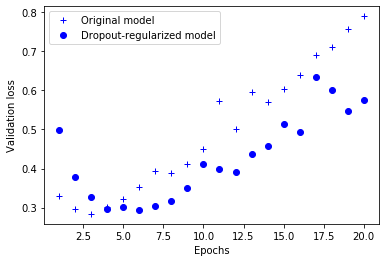

In [27]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()